1. Thư viện và kết nối

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq

# Kết nối với Google Trends
pytrends = TrendReq(hl='en-US', tz=360)

2. Thu thập dữ liệu

In [4]:
# Xác định các từ khóa để phân tích
keywords = ['Big Data', 'Machine Learning', 'Artificial Intelligence']

# Timeframes chia nhỏ để lấy nhiều và chính xác nhất dữ liệu có thể
timeframes = [
    '2024-07-01 2024-07-31', '2024-04-01 2024-06-30', '2024-01-01 2024-03-31',
    '2023-10-01 2023-12-31', '2023-07-01 2023-09-30', '2023-04-01 2023-06-30', '2023-01-01 2023-03-31',
    '2022-10-01 2022-12-31', '2022-07-01 2022-09-30', '2022-04-01 2022-06-30', '2022-01-01 2022-03-31',
    '2021-10-01 2021-12-31', '2021-07-01 2021-09-30', '2021-04-01 2021-06-30', '2021-01-01 2021-03-31',
    '2020-10-01 2020-12-31', '2020-07-01 2020-09-30', '2020-04-01 2020-06-30', '2020-01-01 2020-03-31',
    '2019-10-01 2019-12-31', '2019-07-01 2019-09-30', '2019-04-01 2019-06-30', '2019-01-01 2019-03-31',
    '2018-10-01 2018-12-31', '2018-07-01 2018-09-30', '2018-04-01 2018-06-30', '2018-01-01 2018-03-31',
    '2017-10-01 2017-12-31', '2017-07-01 2017-09-30', '2017-04-01 2017-06-30', '2017-01-01 2017-03-31',
    '2016-10-01 2016-12-31', '2016-07-01 2016-09-30', '2016-04-01 2016-06-30', '2016-01-01 2016-03-31',
    '2015-10-01 2015-12-31', '2015-07-01 2015-09-30', '2015-04-01 2015-06-30', '2015-01-01 2015-03-31',
    '2014-10-01 2014-12-31', '2014-07-01 2014-09-30', '2014-04-01 2014-06-30', '2014-01-01 2014-03-31',
    '2013-10-01 2013-12-31', '2013-07-01 2013-09-30', '2013-04-01 2013-06-30', '2013-01-01 2013-03-31',
    '2012-10-01 2012-12-31', '2012-07-01 2012-09-30', '2012-04-01 2012-06-30', '2012-01-01 2012-03-31',
    '2011-10-01 2011-12-31', '2011-07-01 2011-09-30', '2011-04-01 2011-06-30', '2011-01-01 2011-03-31',
    '2010-10-01 2010-12-31', '2010-07-01 2010-09-30', '2010-04-01 2010-06-30', '2010-01-01 2010-03-31',
    '2009-10-01 2009-12-31', '2009-07-01 2009-09-30', '2009-04-01 2009-06-30', '2009-01-01 2009-03-31',
    '2008-10-01 2008-12-31', '2008-07-01 2008-09-30', '2008-04-01 2008-06-30', '2008-01-01 2008-03-31',
    '2007-10-01 2007-12-31', '2007-07-01 2007-09-30', '2007-04-01 2007-06-30', '2007-01-01 2007-03-31',
    '2006-10-01 2006-12-31', '2006-07-01 2006-09-30', '2006-04-01 2006-06-30', '2006-01-01 2006-03-31',
    '2005-10-01 2005-12-31', '2005-07-01 2005-09-30', '2005-04-01 2005-06-30', '2005-01-01 2005-03-31',
    '2004-10-01 2004-12-31', '2004-07-01 2004-09-30', '2004-04-01 2004-06-30', '2004-01-01 2004-03-31'
]

# Khởi tạo dataframe rỗng để lưu trữ dữ liệu
all_data = pd.DataFrame()
for timeframe in timeframes:
    pytrends.build_payload(keywords, cat=0, timeframe=timeframe, geo='', gprop='')
    data = pytrends.interest_over_time()
    all_data = pd.concat([all_data, data])
    
# Xóa các cột bị trùng lặp nếu cần
all_data = all_data[~all_data.index.duplicated(keep='first')]

3. Xem và xử lí dữ liệu

In [5]:
# Kiểm tra dữ liệu thu thập được
all_data.sort_values(by="date", ascending=True)


# Đảm bảo rằng dữ liệu không chứa giá trị NaN
all_data = all_data.fillna(0)

4. Phân tích biểu đồ và trực quan hóa dữ liệu

4.1. Biểu đồ xu hướng tìm kiếm

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13564\2840129929.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  all_data_yearly = all_data.resample('Y').mean()


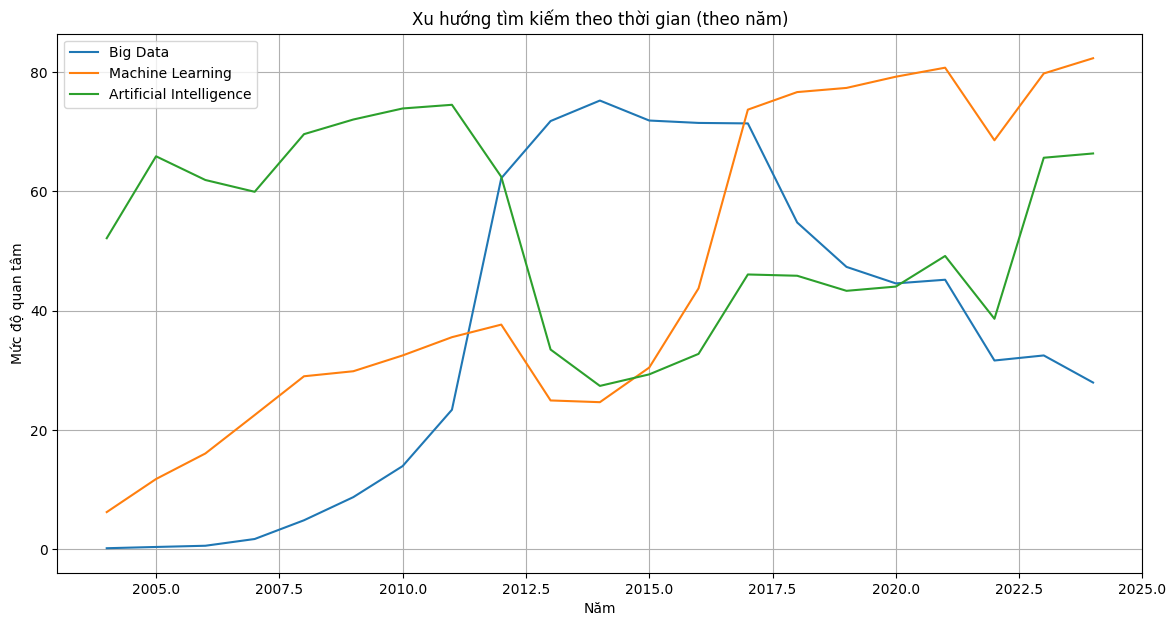

In [6]:
# Resample dữ liệu theo năm, tính trung bình mức độ quan tâm trong mỗi năm
all_data_yearly = all_data.resample('Y').mean()

plt.figure(figsize=(14, 7))
for keyword in keywords:
    plt.plot(all_data_yearly.index.year, all_data_yearly[keyword], label=keyword)

plt.title('Xu hướng tìm kiếm theo thời gian (theo năm)')
plt.xlabel('Năm')
plt.ylabel('Mức độ quan tâm')
plt.legend()
plt.grid(True)
plt.show()

4.2. Biểu đồ tỉ lệ mức độ tìm kiếm (theo từ khóa)

Tỷ lệ phần trăm mức độ quan tâm của các từ khóa:
Từ khóa
Artificial Intelligence    39.293518
Big Data                   27.121385
Machine Learning           33.585097
Name: Mức độ quan tâm, dtype: float64


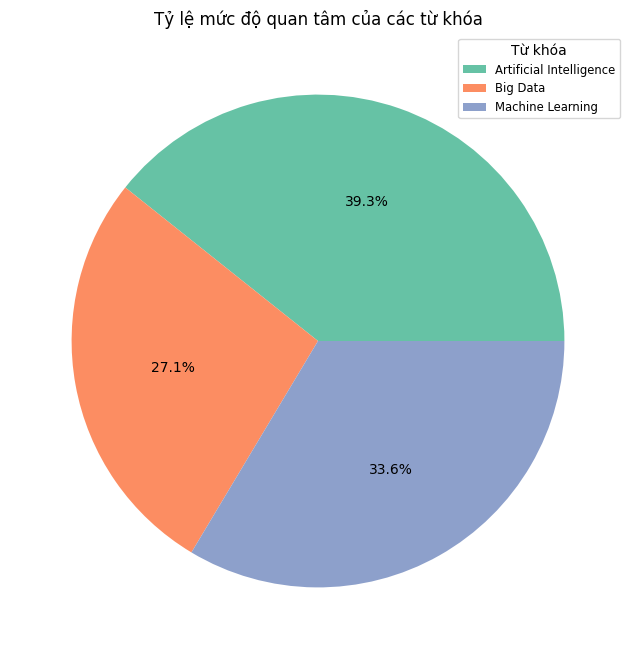

In [7]:
# Resample dữ liệu theo năm và chuyển đổi sang dạng dài
data_long = all_data.reset_index().melt(id_vars='date', value_vars=keywords, var_name='Từ khóa', value_name='Mức độ quan tâm')

# Tính tổng mức độ quan tâm của mỗi từ khóa
total_interest = data_long.groupby('Từ khóa')['Mức độ quan tâm'].sum()

# Tính tỷ lệ phần trăm của tổng mức độ quan tâm
total_sum = total_interest.sum()
percentage_interest = (total_interest / total_sum) * 100

# In ra tỷ lệ phần trăm trước khi vẽ biểu đồ
print("Tỷ lệ phần trăm mức độ quan tâm của các từ khóa:")
print(percentage_interest)

# Tạo bảng màu sắc cho từng từ khóa
colors = sns.color_palette('Set2', len(total_interest))

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(total_interest, labels=None, autopct='%1.1f%%', colors=colors)

# Thêm chú thích theo màu
plt.legend(wedges, total_interest.index, title='Từ khóa', loc='best', fontsize='small')

plt.title('Tỷ lệ mức độ quan tâm của các từ khóa')
plt.show()

4.3. Biểu đồ tổng mức độ quan tâm của các từ khóa

Tổng mức độ quan tâm của các từ khóa:
Từ khóa
Big Data                   274054
Machine Learning           339368
Artificial Intelligence    397050
Name: Mức độ quan tâm, dtype: int32


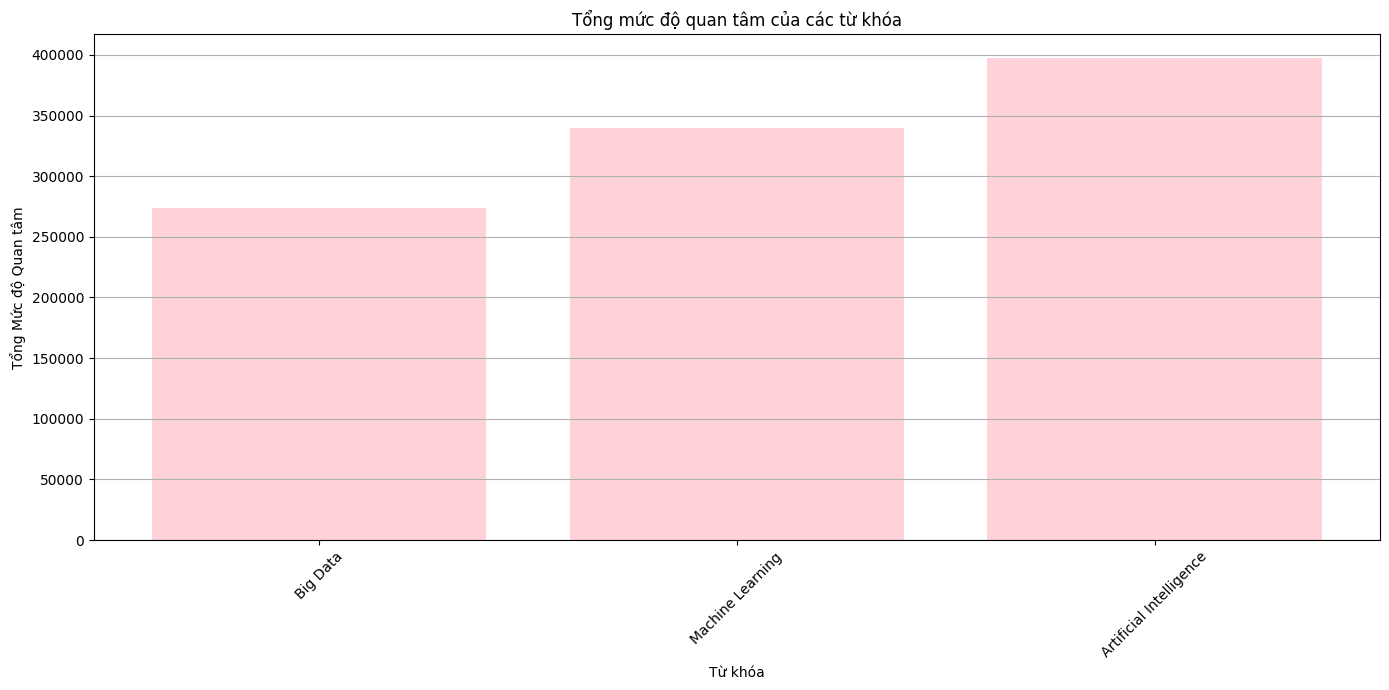

In [8]:
# Tính tổng mức độ quan tâm của từng từ khóa trên toàn bộ dữ liệu
data_long = all_data.reset_index().melt(id_vars='date', value_vars=keywords, var_name='Từ khóa', value_name='Mức độ quan tâm')
total_interest = data_long.groupby('Từ khóa')['Mức độ quan tâm'].sum()

# Sắp xếp tổng mức độ quan tâm để dễ đọc
total_interest = total_interest.sort_values()

# In kết quả tổng mức độ quan tâm để kiểm tra
print("Tổng mức độ quan tâm của các từ khóa:")
print(total_interest)

# Vẽ biểu đồ cột
plt.figure(figsize=(14, 7))
plt.bar(total_interest.index, total_interest, color='pink', alpha=0.7)
plt.title('Tổng mức độ quan tâm của các từ khóa')
plt.xlabel('Từ khóa')
plt.ylabel('Tổng Mức độ Quan tâm')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

4.4. Biểu đồ thể hiện sự quan tâm của từng từ khóa theo thời gian

Dữ liệu sau khi xử lý
       Big Data  Machine Learning  Artificial Intelligence
date                                                      
2004   0.174863          6.232240                52.161202
2005   0.386301         11.780822                65.901370
2006   0.589041         16.063014                61.926027
2007   1.720548         22.509589                59.947945
2008   4.863388         29.010929                69.612022
2009   8.742466         29.854795                72.068493
2010  13.947945         32.504110                73.920548
2011  23.397260         35.567123                74.536986
2012  62.224044         37.674863                62.464481
2013  71.810959         24.956164                33.493151
2014  75.249315         24.665753                27.394521
2015  71.898630         30.468493                29.328767
2016  71.497268         43.754098                32.765027
2017  71.416438         73.723288                46.082192
2018  54.800000         76.668493 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13564\2056741403.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_resampled = all_data.resample('Y').mean().fillna(0)  # Resample dữ liệu theo năm


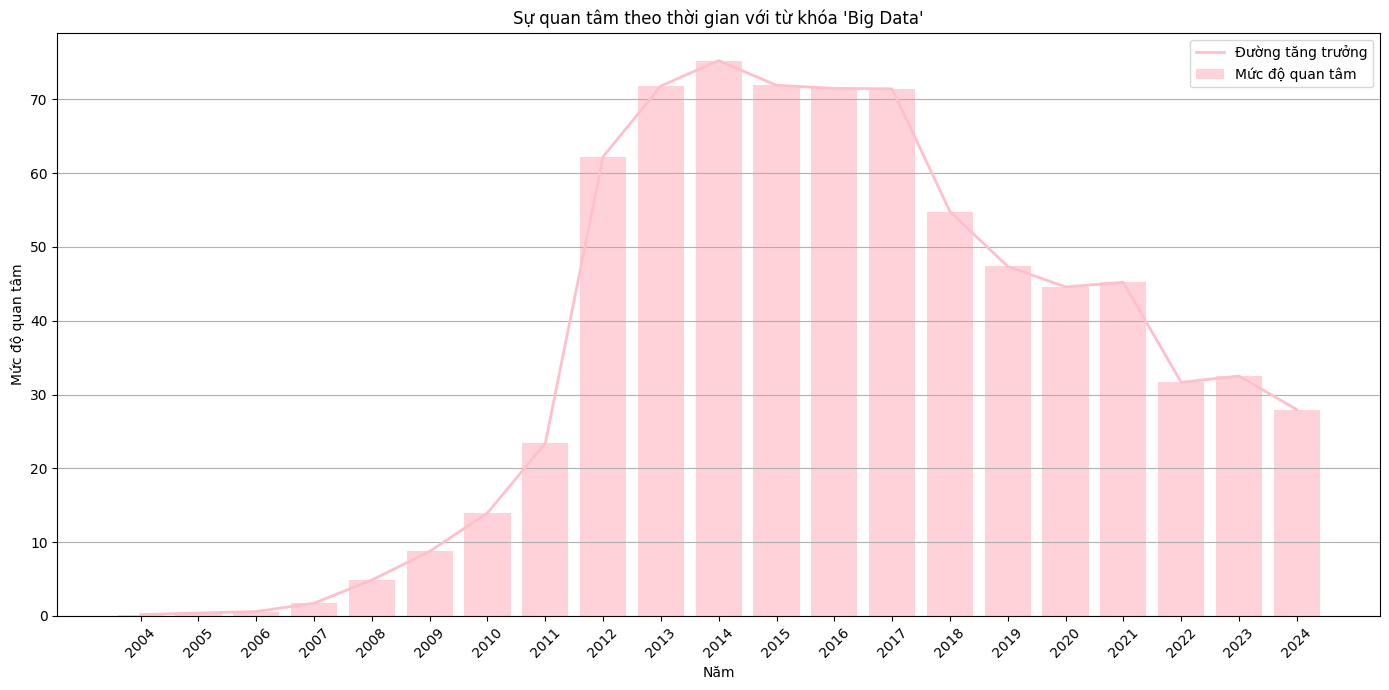

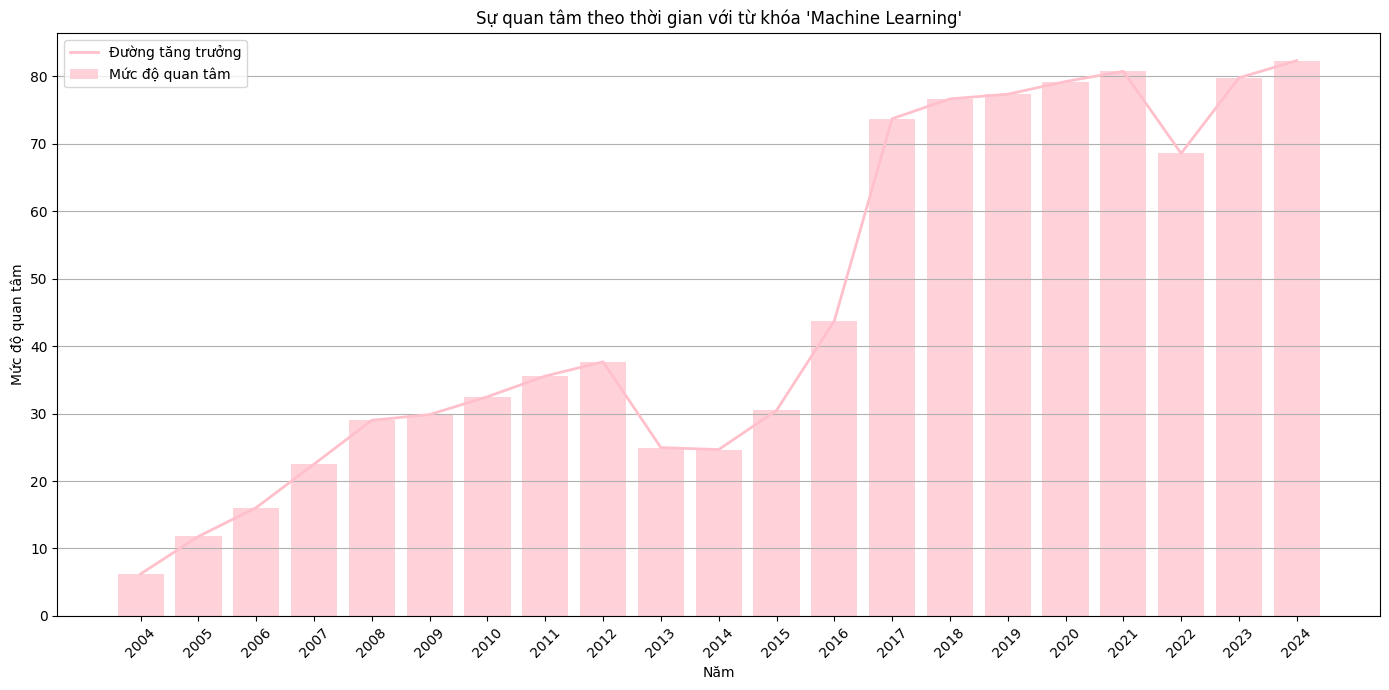

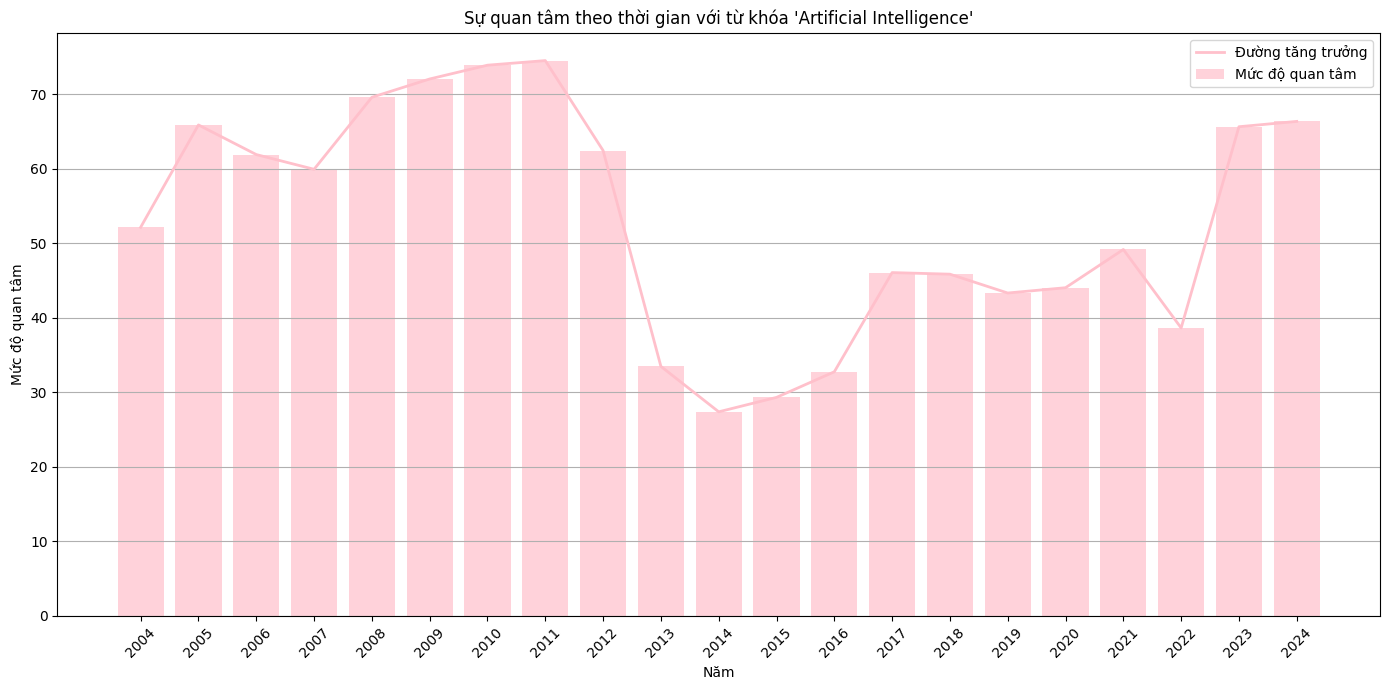

In [9]:
# Đảm bảo rằng chỉ những dữ liệu cần thiết được giữ lại
data_resampled = all_data.resample('Y').mean().fillna(0)  # Resample dữ liệu theo năm
data_resampled = data_resampled[['Big Data', 'Machine Learning', 'Artificial Intelligence']]
data_resampled.index = data_resampled.index.to_period('Y').astype(str)  # Đảm bảo chỉ mục là năm

# Kiểm tra dữ liệu đã xử lý
print(f'Dữ liệu sau khi xử lý')
print(data_resampled)

# Tạo biểu đồ cột cho từng từ khóa và vẽ đường tăng trưởng
keywords = ['Big Data', 'Machine Learning', 'Artificial Intelligence']

for keyword in keywords:
    plt.figure(figsize=(14, 7))
    
    # Vẽ biểu đồ cột
    plt.bar(data_resampled.index, data_resampled[keyword], color='pink', alpha=0.7, label='Mức độ quan tâm')

    # Vẽ đường tăng trưởng với đường cong mềm mại
    sns.lineplot(x=data_resampled.index, y=data_resampled[keyword], color='pink', linewidth=2, label='Đường tăng trưởng', marker=None, linestyle='-')
    
    plt.title(f"Sự quan tâm theo thời gian với từ khóa '{keyword}'")
    plt.xlabel('Năm')
    plt.ylabel('Mức độ quan tâm')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

4.5. Biểu đồ tầng mức độ quan tâm theo thời gian

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13564\3131049607.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_yearly = all_data.resample('Y').mean().fillna(0)  # Resample theo năm


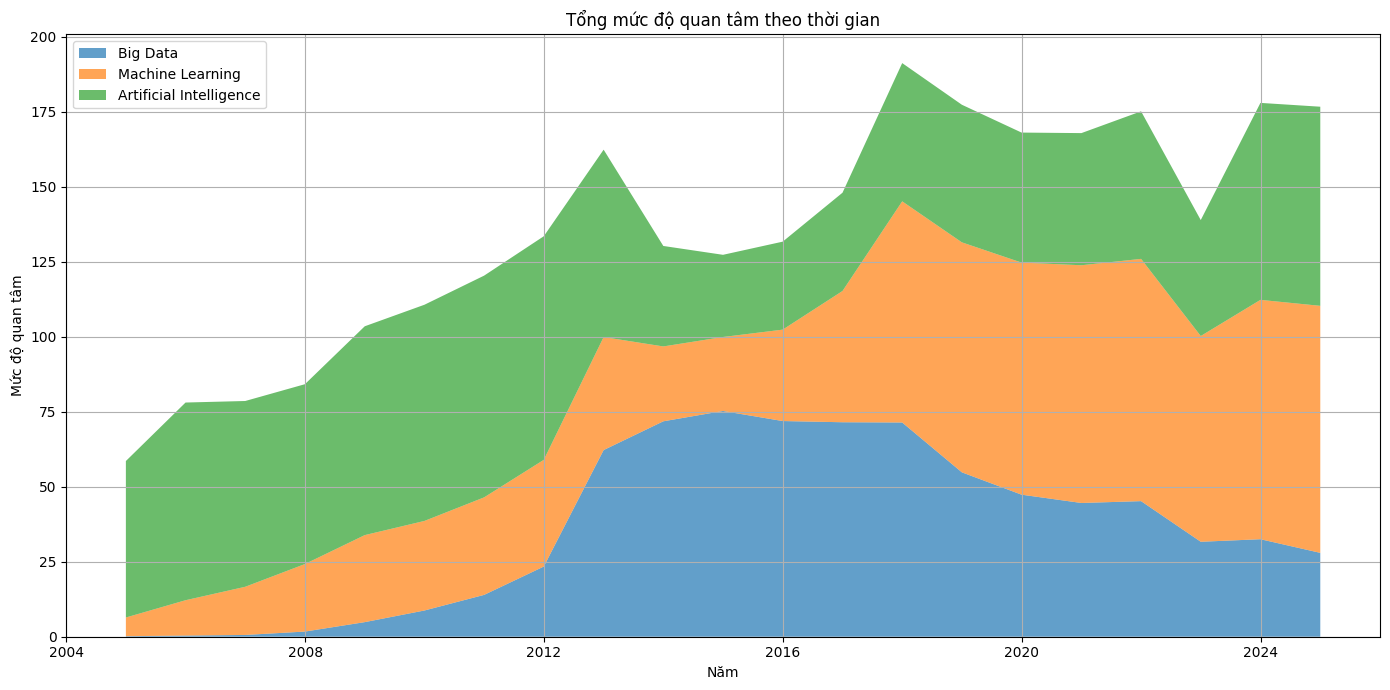

In [10]:
data_yearly = all_data.resample('Y').mean().fillna(0)  # Resample theo năm
plt.figure(figsize=(14, 7))
plt.stackplot(data_yearly.index, [data_yearly[keyword] for keyword in keywords], labels=keywords, alpha=0.7)
plt.title('Tổng mức độ quan tâm theo thời gian')
plt.xlabel('Năm')
plt.ylabel('Mức độ quan tâm')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

4.6. Biểu đồ ma trận tương quan

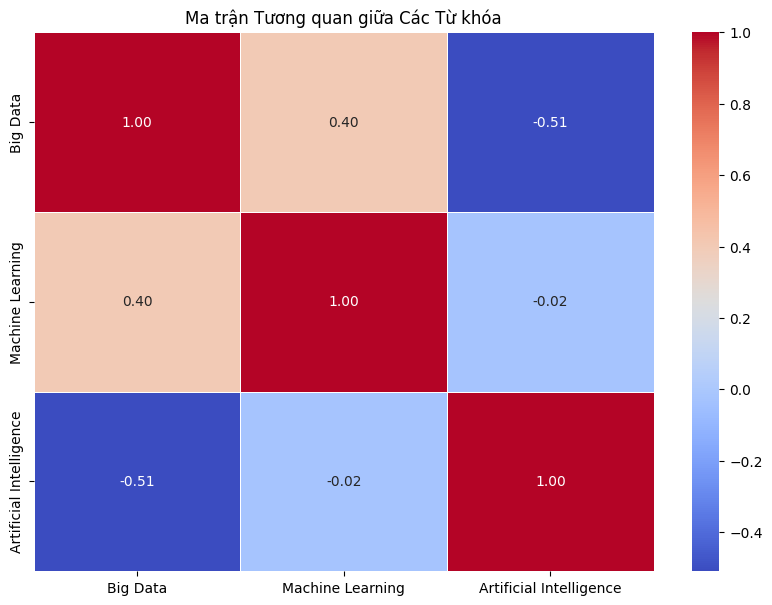

In [11]:
# Đảm bảo rằng dữ liệu gốc không chứa giá trị NaN
all_data_clean = all_data.fillna(0)

# Tính toán ma trận tương quan
correlation = all_data_clean[keywords].corr()

# Tạo heatmap cho ma trận tương quan
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Ma trận Tương quan giữa Các Từ khóa')
plt.show()

4.7. Biểu đồ nóng (Heatmap) sự quan tâm theo thời gian

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13564\2590608390.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_resampled = all_data.resample('Y').mean().fillna(0)


Dữ liệu sau khi xử lý:
       Big Data  Machine Learning  Artificial Intelligence
date                                                      
2004   0.174863          6.232240                52.161202
2005   0.386301         11.780822                65.901370
2006   0.589041         16.063014                61.926027
2007   1.720548         22.509589                59.947945
2008   4.863388         29.010929                69.612022
2009   8.742466         29.854795                72.068493
2010  13.947945         32.504110                73.920548
2011  23.397260         35.567123                74.536986
2012  62.224044         37.674863                62.464481
2013  71.810959         24.956164                33.493151
2014  75.249315         24.665753                27.394521
2015  71.898630         30.468493                29.328767
2016  71.497268         43.754098                32.765027
2017  71.416438         73.723288                46.082192
2018  54.800000         76.668493

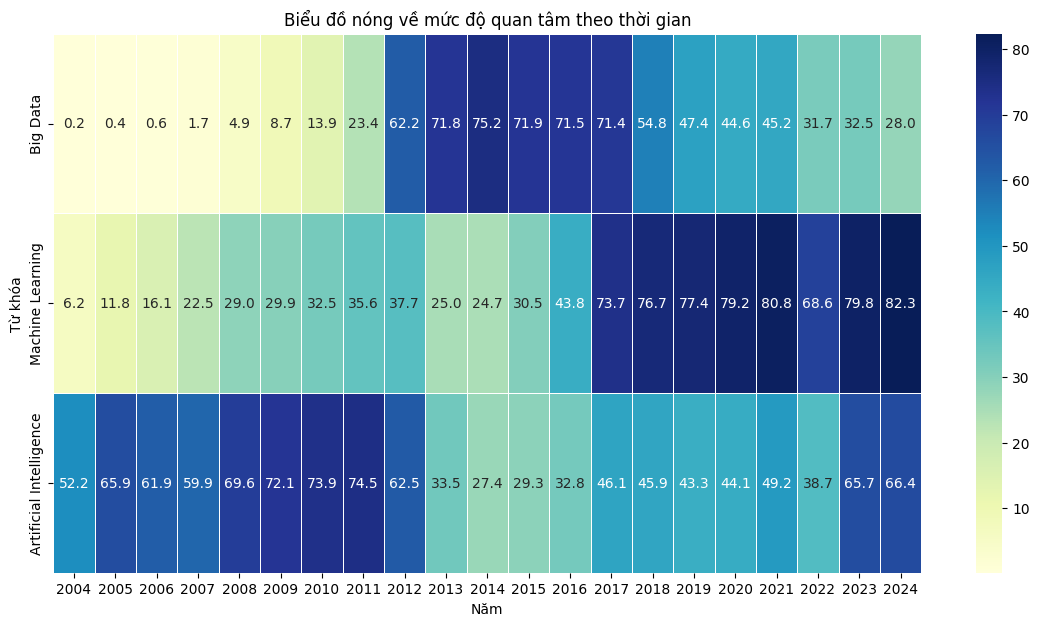

In [12]:
# Resample dữ liệu theo năm, tính trung bình mức độ quan tâm trong mỗi năm
data_resampled = all_data.resample('Y').mean().fillna(0)

# Xóa các cột không cần thiết
data_resampled = data_resampled[['Big Data', 'Machine Learning', 'Artificial Intelligence']]

# Đảm bảo rằng chỉ mục là kiểu chuỗi (năm)
data_resampled.index = data_resampled.index.to_period('Y').astype(str)

# Kiểm tra dữ liệu đã xử lý
print(f'Dữ liệu sau khi xử lý:')
print(data_resampled.sort_values(by="date", ascending=True))

# Vẽ heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(data_resampled.T, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Biểu đồ nóng về mức độ quan tâm theo thời gian')
plt.xlabel('Năm')
plt.ylabel('Từ khóa')
plt.show()

4.8. Biểu đồ tần suất tìm kiếm theo tháng trong năm

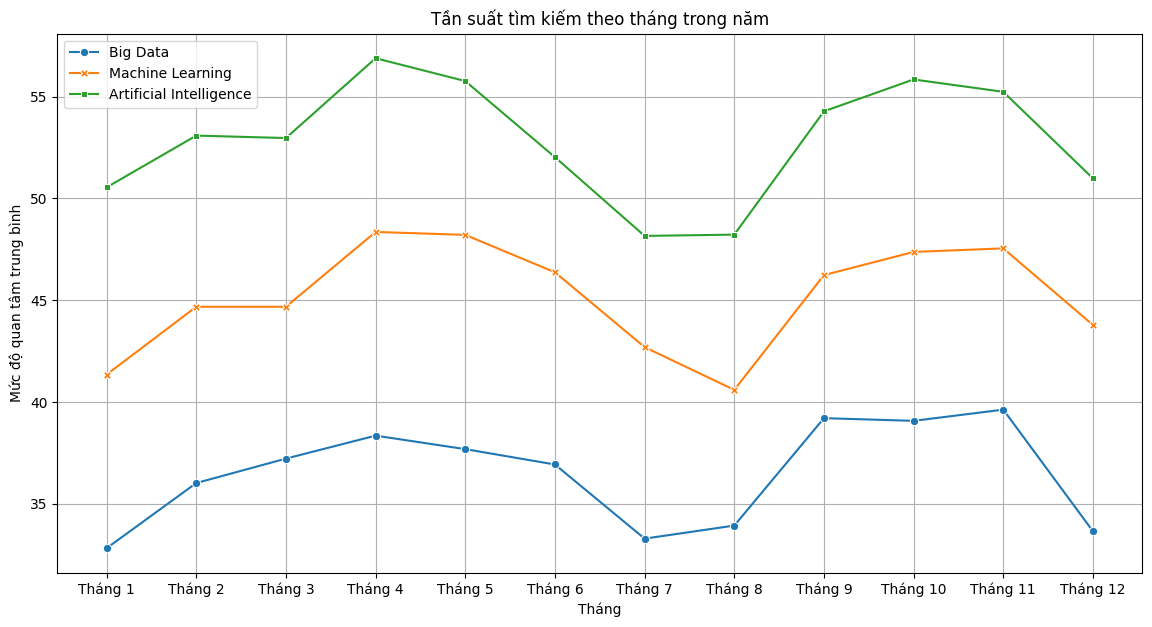

In [13]:
# Tính tần suất tìm kiếm theo tháng trong năm
all_data['month'] = all_data.index.month
monthly_avg = all_data.groupby('month')[keywords].mean()

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_avg, markers=True, dashes=False)
plt.title('Tần suất tìm kiếm theo tháng trong năm')
plt.xlabel('Tháng')
plt.ylabel('Mức độ quan tâm trung bình')
plt.xticks(ticks=range(1, 13), labels=['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4', 'Tháng 5', 'Tháng 6', 'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11', 'Tháng 12'])
plt.grid(True)
plt.show()